In [2]:
# Import modules 
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt
from scipy.stats import shapiro, wilcoxon, mannwhitneyu

%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\A. Performance analysis/performance_analysis_functions.ipynb"

####  Read data 

In [4]:
csv_file_path='C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_no_baseline.csv'
runs=pd.read_csv(csv_file_path)

####  Performances across sessions within groups

<Figure size 1800x1200 with 0 Axes>

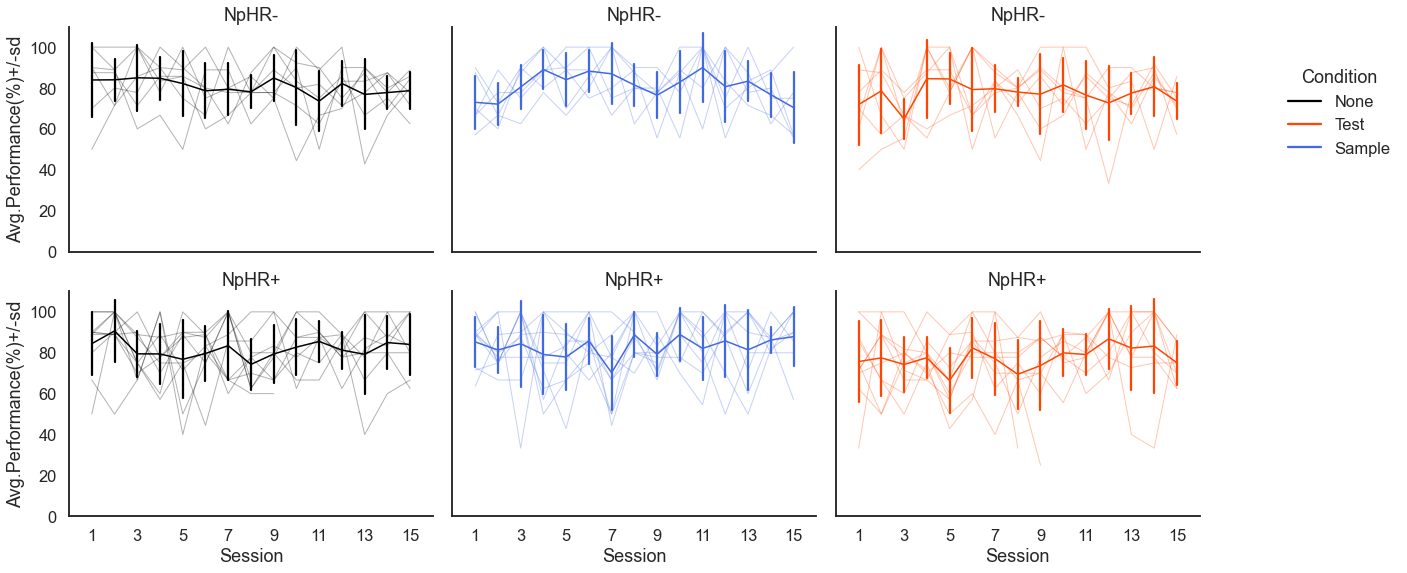

In [5]:
session_perfs=plot_performances_across_sessions(runs)

#### Plot performance variation across sessions

In [6]:
performance_diff = session_perfs.groupby(['group','rat']).apply(calc_session_performance_diffs).reset_index(drop=True)

<Figure size 1800x1200 with 0 Axes>

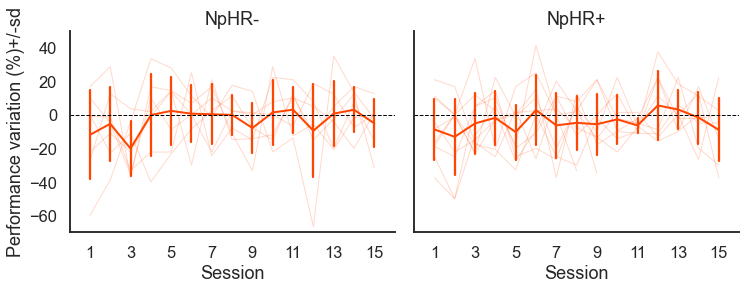

In [7]:
plot_performance_variation_across_sessions(performance_diff, 'test_none_diff', 'orangered')

<Figure size 1800x1200 with 0 Axes>

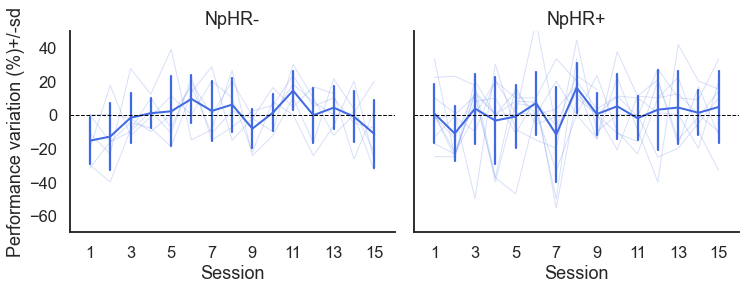

In [46]:
plot_performance_variation_across_sessions(performance_diff, 'sample_none_diff', 'royalblue')

#### Cumulative errors across time

In [8]:
#Keep the error runs only
errors = runs[runs['outcome']==0]

<Figure size 1800x1200 with 0 Axes>

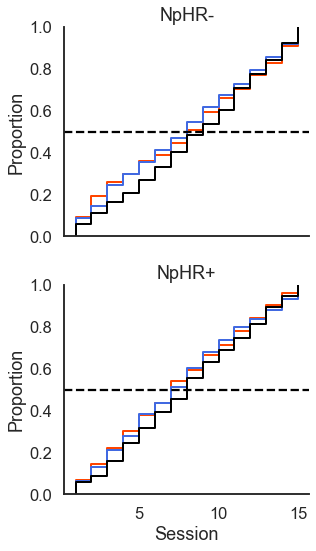

In [9]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)
g = sns.displot(kind='ecdf', data=errors, row='group', x='session_nr', 
                hue=errors['stim_condition'].map({0:'None', 1:'Sample', 3:'Test'}),
                palette=['black', 'royalblue', 'orangered'],
                height=4, aspect=1.2,stat='proportion', linewidth=2)

ax = g.axes.flatten()
ax[0].set(title='NpHR-', xlabel='Session')
ax[0].axhline(0.5, linestyle='dashed', color='black')
ax[1].set(title='NpHR+', xlabel='Session')
ax[1].axhline(0.5, linestyle='dashed', color='black')
g._legend.remove()#set(title='Condition')
sns.despine()

#### Plot individual cumulative distributions

In [ ]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)
g = sns.displot(kind='ecdf', data=errors, col='rat', col_wrap=4, hue='stim_condition',
                x='session_nr', palette=['black', 'royalblue', 'orangered'],
                height=5, aspect=1,stat='proportion', linewidth=2)

ax = g.axes.flatten()
sns.despine()